# Churn Prediction

### Import packages and data

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)

%matplotlib inline
sns.set(style="white", context="notebook", palette='deep')

In [3]:
#data = pd.read_csv('C:/Users/hollo/Google Drive/data/vodafone/telco.csv', sep = ',')
data = pd.read_csv('telco.csv', sep = ',')

### Exploratory data analysis

In [4]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,2,13,44,1,9,64.0,4,5,0.0,0,2,0,0,1,0,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,0,0,0,0,0,0,1,0,0,1,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,1,0,1,1,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,0,1,1,0,1,1,1,1,0,4,1
2,3,68,52,1,24,116.0,1,29,0.0,1,2,1,0,1,0,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,0,0,0,0,1,1,0,1,0,3,0
3,2,33,33,0,12,33.0,2,0,0.0,1,1,0,0,0,0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,0,0,0,0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,0,0,0,0,1,0,1,1,0,3,0


In [20]:
# type of each field in the dataset
field_type = data.dtypes.to_frame()
field_type.columns = ['type']
field_type

,type
region,int64
tenure,int64
age,int64
marital,int64
address,int64
income,float64
ed,int64
employ,int64
retire,float64
gender,int64


All the variables are integers or floats, therefore categorical variables are coded as well.

In [10]:
data.shape
# shape of dataframe: 1000 rows and 36 columns

(1000, 36)

In [11]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,11.723100,13.274000,14.219800,13.781000,11.583900,574.050050,551.258500,465.632850,605.773750,442.736900,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,10.363486,16.902122,19.068539,14.084496,19.719426,789.974346,915.746733,857.273071,830.126069,971.471264,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,90.137500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,8.525000,0.000000,0.000000,12.000000,0.000000,285.475000,0.000000,0.000000,332.500000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,755.025000,846.900000,579.450000,910.000000,316.500000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,7257.600000,5916.000000,5028.650000,7515.000000,7856.850000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check the distrubition of the target variable first:

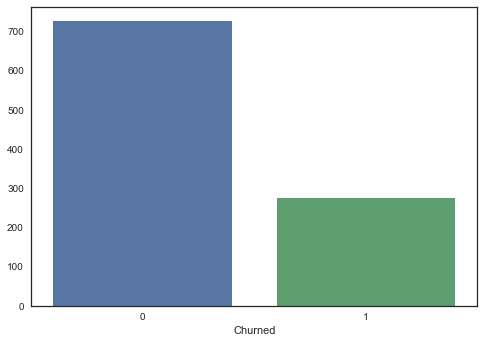

In [62]:
sns.countplot(x = 'churn', data = data).set(xlabel = 'Churned', ylabel ='');


The classes are inbalanced (as usual in similar problems), though the cardinlaity of the group '1' (the clients who have churned) is not very small.

### Data preprocessing

In [33]:
# check the values of the variables which are nominal according to the data description
data[['region', 'marital', 'retire', 'gender', 'custcat']].apply(pd.Series.value_counts)


,region,marital,retire,gender,custcat
0,NaN,505.0,953.0,483.0,NaN
1,322.0,495.0,47.0,517.0,266.0
2,334.0,NaN,NaN,NaN,217.0
3,344.0,NaN,NaN,NaN,281.0
4,NaN,NaN,NaN,NaN,236.0


It can be seen that marital, retire and gender are encoded as dummies similarly as flag variables.

In [61]:
# List the variables to be one hot encoded (categorical variables which are not dummies already)
# LabelEncoding is not needed since categorical variables are already encoded
# first categories are dropped since in a predictive model for a categorical variable with k categories only k-1 can be used
cat_list = ['region', 'custcat']
data_ohe = pd.get_dummies(data = data, columns = cat_list, drop_first = True)

In [64]:
X = data.drop(['churn'], axis = 1)
y = data[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

### Predictive models